In [2]:

from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        ddgs_images_gen = ddgs.images(term)
        count = 0
        ddgs_images_list = []
        while count < max_images:
            image = next(ddgs_images_gen)
            ddgs_images_list.append(image.get('image'))
            count = count+1
        return ddgs_images_list


In [3]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg'

/Users/hrant/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


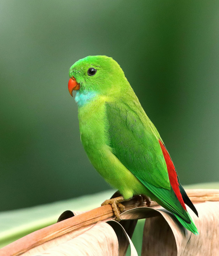

In [4]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


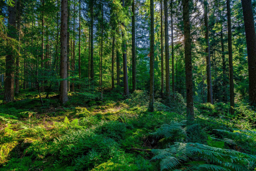

In [5]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [6]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)  
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_image(path/o, max_size=400, dest=path/o)


Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

9

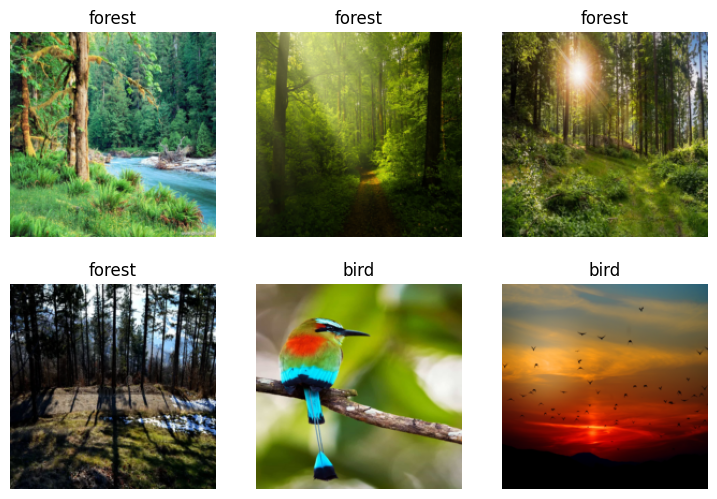

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)
dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.369306,0.009422,0.000000,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.022412,0.004430,0.000000,01:00
1,0.015377,0.008117,0.000000,01:02
2,0.011024,0.000306,0.000000,01:02


In [10]:
is_bird,_,probs = learn.predict(PILImage.create('forest.jpg'))


In [12]:
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a bird: 0.0000


In [23]:
bear_learn = load_learner('bear_model.pkl')
category,pred_idx,probs = bear_learn.predict(PILImage.create('grizzly.webp'))
print(category)
print(pred_idx)
print(probs)
print(bear_learn.dls.vocab)


grizzly
tensor(1)
tensor([1.8422e-06, 1.0000e+00, 3.0608e-08])
['black', 'grizzly', 'teddy']
